In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')
print(train0.shape,test0.shape)

(54931, 21) (11834, 20)


In [ ]:
train0['Arrival Delay in Minutes'].replace(np.nan,train0['Arrival Delay in Minutes'].mode()[0],inplace=True)
test0['Arrival Delay in Minutes'].replace(np.nan,train0['Arrival Delay in Minutes'].mode()[0],inplace=True)

#train.drop('Arrival Delay in Minutes',axis=1,inplace=True)
#test.drop('Arrival Delay in Minutes',axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(12,10))
corr_mat = train0.corr()
sns.heatmap(corr_mat,annot= True)
plt.show()

In [ ]:
nn = train0.dtypes != 'object'
num_cols = list(nn[nn].index)
num_cols

['id',
 'Age',
 'Distance Travelled',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Platform Number',
 'Food Service',
 'Railway service',
 'Seat comfort',
 'Ticket-collector service',
 'Washroom service',
 'Baggage security score',
 'Compartment safety score',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [ ]:
cc = test0.dtypes == 'object'
cat_cols = list(cc[cc].index)
cat_cols

['Gender', 'Travel', 'Mode of reservation', 'Class']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_train0 = train0.copy()
label_test0 = test0.copy()

label_encoder = LabelEncoder()
for cols in cat_cols:
  label_train0[cols] = label_encoder.fit_transform(label_train0[cols])
  label_test0[cols] = label_encoder.transform(label_test0[cols])




In [ ]:
to_scale = ['Distance Travelled','Ease of Online booking','Food Service','Railway service','Seat comfort','Ticket-collector service','Washroom service','Baggage security score',
 'Compartment safety score','Cleanliness']

In [ ]:
train0_scaled = label_train0.copy()
test0_scaled = label_test0.copy()

In [ ]:
train0_scaled.columns

Index(['Gender', 'Travel', 'Mode of reservation', 'Class',
       'Distance Travelled', 'Ease of Online booking', 'Food Service',
       'Railway service', 'Seat comfort', 'Ticket-collector service',
       'Washroom service', 'Baggage security score',
       'Compartment safety score', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [ ]:
#scaling only numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train0_scaled[to_scale] = scaler.fit_transform(train0_scaled[to_scale])
test0_scaled[to_scale] = scaler.transform(test0_scaled[to_scale])



In [ ]:
print(train0_scaled.shape,test0_scaled.shape)

(54931, 15) (11834, 14)


In [ ]:
corr_mat = train0[num_cols].corr()
corr_target = abs(corr_mat['satisfaction'])
selected_features = corr_target[corr_target>0.1]
selected_features

In [ ]:
mycols_train0 = ['Gender','Travel','Mode of reservation','Class','Distance Travelled','Ease of Online booking',
          'Food Service','Railway service','Seat comfort','Ticket-collector service','Washroom service',
          'Baggage security score','Compartment safety score','Cleanliness','satisfaction']
mycols_test0 = ['Gender','Travel','Mode of reservation','Class','Distance Travelled','Ease of Online booking',
          'Food Service','Railway service','Seat comfort','Ticket-collector service','Washroom service',
          'Baggage security score','Compartment safety score','Cleanliness']
label_train0 = label_train0[mycols_train0]
label_test0 = label_test0[mycols_test0]

In [ ]:
print(label_train0.shape,label_test0.shape)

(54931, 15) (11834, 14)


In [ ]:
from sklearn.model_selection import train_test_split
X0 = label_train0.drop('satisfaction',axis=1)
y0 = label_train0['satisfaction']
print(X0.shape,y0.shape)

(54931, 14) (54931,)


In [ ]:
X0_scaled = train0_scaled.drop('satisfaction',axis=1)
y0_scaled = train0_scaled['satisfaction']


In [ ]:
y_label = np.asarray(y0).reshape(-1,1)
y_label.shape 

(54931, 1)

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(X0,y0,test_size=0.2,random_state=42)
print(X_train.shape,X_valid.shape,y_train.shape,y_valid.shape)

(43944, 14) (10987, 14) (43944,) (10987,)


In [ ]:
X_train_scaled,X_valid_scaled,y_train_scaled,y_valid_scaled = train_test_split(X0_scaled,y0_scaled,test_size=0.2,random_state=42)
print(X_train_scaled.shape,X_valid_scaled.shape,y_train_scaled.shape,y_valid_scaled.shape)

(43944, 14) (10987, 14) (43944,) (10987,)


In [ ]:
X_train_features,X_valid_features = np.asarray(X_train),np.asarray(X_valid)
y_train_features,y_valid_features = np.asarray(y_train).reshape(-1,1),np.asarray(y_valid).reshape(-1,1)

In [ ]:
X_train_scaled_features,X_valid_scaled_features = np.asarray(X_train_scaled),np.asarray(X_valid_scaled)
y_train_scaled_features,y_valid_scaled_features = np.asarray(y_train_scaled).reshape(-1,1),np.asarray(y_valid_scaled).reshape(-1,1)

In [ ]:
for i in range(3):
  print(X_train_features[i],y_train_features[i])

In [ ]:
from sklearn.model_selection import RepeatedKFold,cross_val_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
#try a NN
n_inputs0 = 14
n_outputs0 = 1
model05 = Sequential()
model05.add(Dense(512,input_dim=n_inputs0,kernel_initializer='he_uniform',activation='relu'))
#model01.add(Dense(256,activation='relu'))
model05.add(Dense(256,activation='relu'))
#model01.add(Dense(128,activation='relu'))
model05.add(Dense(128,activation='relu'))
#model01.add(Dense(64,activation='relu'))
model05.add(Dense(64,activation='relu'))
model05.add(Dense(32,activation='relu'))
model05.add(Dense(n_outputs0,activation='sigmoid'))
model05.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model05.summary()

In [ ]:
X_train_features.shape

(43944, 14)

In [ ]:
epochs = 50

history = model05.fit(X_train_scaled_features,y_train_scaled_features,epochs = epochs,validation_data = (X_valid_scaled_features,y_valid_scaled_features),
                    verbose = 1,batch_size=64)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history

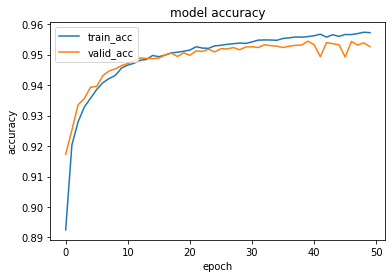

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'valid_acc'], loc='upper left')
plt.show()

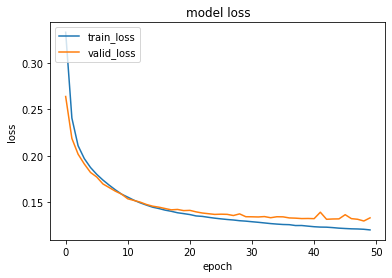

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'valid_loss'], loc='upper left')
plt.show()


In [ ]:
test0_scaled.shape

(11834, 14)

In [ ]:
test0_scaled.head()

In [ ]:
pred01 = model04.predict(test0_scaled)
pred01

array([[0.931119  ],
       [0.8449024 ],
       [0.00628304],
       ...,
       [0.9891734 ],
       [0.86696845],
       [0.15848574]], dtype=float32)

In [ ]:
pred01 = (pred01 > 0.5).astype(np.int32)
pred01

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
len(pred01)

11834

In [ ]:
sub0 = pd.DataFrame(pred01,columns=['satisfaction'])
sub0.shape

(11834, 1)

In [ ]:
sub0.head()

,satisfaction
0,1
1,1
2,0
3,1
4,0


In [ ]:
sub0.set_index('satisfaction',inplace=True)
sub0.to_csv('submission.csv')

In [ ]:
from pycaret import classification
classification.setup(data=label_train0,target='satisfaction')

In [ ]:
classification.compare_models()

In [ ]:
model = classification.create_model('lightgbm') #0.9648

In [ ]:
tuned_model = classification.tune_model(model, optimize='Accuracy')

In [ ]:
classification.plot_model(tuned_model,plot='confusion_matrix') #0.9598

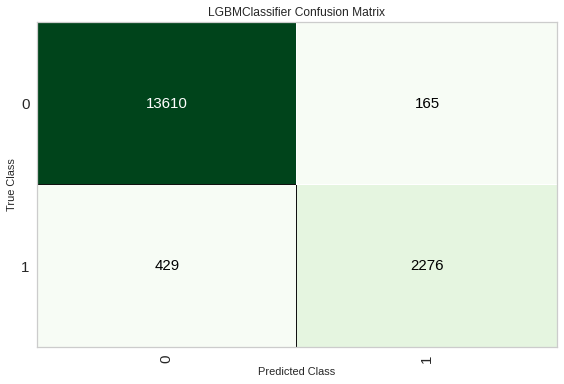

In [ ]:
classification.plot_model(tuned_model,plot='confusion_matrix') #0.96

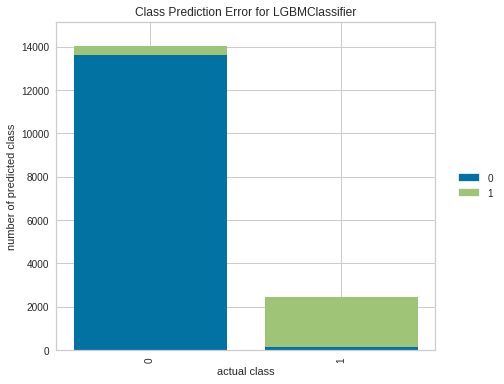

In [ ]:
classification.plot_model(tuned_model,plot='error')

In [ ]:
classification.predict_model(tuned_model)#calculate the test accuracy

In [ ]:
final_model = classification.finalize_model(tuned_model)

In [ ]:
predictions = classification.predict_model(final_model,data=label_test0)
y_predicted = predictions['Label']
len(y_predicted)

11834

In [ ]:
submission_df = pd.DataFrame({'satisfaction':y_predicted})
submission_df.shape

(11834, 1)

In [ ]:
submission_df.set_index('satisfaction',inplace=True)
submission_df.to_csv('submission.csv')

In [ ]:
#level 2
train2 = pd.read_csv('train2.csv')
test2 = pd.read_csv('test2.csv')
print(train2.shape,test2.shape)

(742, 31) (318, 17)


In [ ]:
train2.drop('ids',axis=1,inplace=True)
test2.drop('ids',axis=1,inplace=True)

In [ ]:
mylist = ['bod', 'ammonium', 'silicon_dixoide', 'potassium_dichromate',
       'oxygen_saturation', 'conduct', 'nitrogen_dioxide', 'hardness',
       'nitrate', 'carbon_dioxide', 'potassium_permanganate', 'chlorine',
       'phosphate', 'oxygen', 'standard_ph', 'standard_temperature']
for col in mylist:
  train2.replace({0:train2[col].mean()},inplace=True)
  test2.replace({0:test2[col].mean()},inplace=True)

In [ ]:
targets = ['38100','57500','55800','59300','29600','33400','25400','19400','50390','37880','17300','49700','34500','30400']

In [ ]:
X,y = train2[mylist],train2[targets]
print(X.shape,y.shape)

(742, 16) (742, 14)


In [ ]:
X_test = test2.copy()
X_test.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[mylist] = scaler.fit_transform(X[mylist])
X_test[mylist] = scaler.transform(X_test[mylist])

In [ ]:
X_test.head()

,bod,ammonium,silicon_dixoide,potassium_dichromate,oxygen_saturation,conduct,nitrogen_dioxide,hardness,nitrate,carbon_dioxide,potassium_permanganate,chlorine,phosphate,oxygen,standard_ph,standard_temperature
0,0.017316,0.001730,0.021164,0.006739,0.560017,0.129765,0.000000,0.196172,0.003268,0.025249,0.016277,0.022329,0.002907,0.534314,0.608696,0.939516
1,0.011544,0.008648,0.978836,0.065789,0.243026,0.082725,0.059603,0.043062,0.080065,0.785124,0.069356,0.175439,0.046512,0.254902,0.086957,0.725806
2,0.036075,0.015814,0.068783,0.031772,0.228656,0.267640,0.099338,0.401914,0.098039,0.173554,0.021939,0.306220,0.052326,0.264706,0.260870,0.532258
3,0.018759,0.003212,0.084656,0.004172,0.447168,0.111111,0.038553,0.186603,0.062092,0.025249,0.010616,0.020734,0.000000,0.627451,0.434783,0.209677
4,0.038961,0.000988,0.285714,0.029525,0.412511,0.197891,0.006623,0.358852,0.052288,0.025249,0.024062,0.065391,0.156977,0.470588,0.521739,0.560484


In [ ]:
test2.shape

(318, 16)

In [ ]:
X_ = np.asarray(X)
y_ = np.asarray(y)

In [ ]:
y_ = y_.round()

In [ ]:
#summarize the first few sample:
for i in range(3):
  print(X_[i],y_[i])

[0.02886003 0.01284902 0.24338624 0.05198973 0.41758242 0.17518248
 0.0397351  0.22488038 0.12418301 0.01869177 0.05307856 0.21371611
 0.02325581 0.62745098 0.39130435 0.10483871] [0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.]
[0.03607504 0.00494193 0.47619048 0.04300385 0.39010989 0.15490673
 0.04635762 0.15311005 0.16339869 0.05785124 0.04387827 0.10845295
 0.04069767 0.42647059 0.34782609 0.64112903] [0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]
[0.0995671  0.00790709 0.32804233 0.05840822 0.3567202  0.16301703
 0.01986755 0.24401914 0.10784314 0.07024793 0.06157113 0.215311
 0.05232558 0.40686275 0.34782609 0.56048387] [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]


In [ ]:
#get the model
def get_model(n_inputs,n_outputs):
  model = Sequential()
  model.add(Dense(20,input_dim=n_inputs,kernel_initializer='he_uniform',activation='relu'))
  model.add(Dense(n_outputs,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam')
  return model

In [ ]:
#evaluate the model using k-fold cross-validation
def evaluate_model(X,y):
  results = []
  n_inputs,n_outputs = X.shape[1],y.shape[1]
  cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

  #enumerate the folds
  for train_ix,test_ix in cv.split(X):
    X_train, X_test = X[train_ix],X[test_ix]
    y_train,y_test = y[train_ix],y[test_ix]

    #define model
    model = get_model(n_inputs,n_outputs)
    model.fit(X_train,y_train,verbose=0,epochs=50)

    #make a prediction
    yhat = model.predict(X_test)
    yhat = yhat.round()

    #calcualte the accuracy
    acc = accuracy_score(y_test,yhat)
    results.append(acc)
  return results



In [ ]:
results = evaluate_model(X_,y_)

In [ ]:
n_inputs,n_outputs = X_.shape[1],y_.shape[1]

model0 = Sequential()
model0.add(Dense(300,input_dim=n_inputs,kernel_initializer='he_uniform',activation='relu'))
model0.add(Dense(250,activation='relu'))
model0.add(Dense(200,activation='relu'))
model0.add(Dense(150,activation='relu'))
model0.add(Dense(100,activation='relu'))
model0.add(Dense(50,activation='relu'))
model0.add(Dense(n_outputs,activation='sigmoid'))
model0.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model0.fit(X_,y_,verbose=1,epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 4ms/step - loss: 0.6602 - accuracy: 0.0175
Epoch 2/150
24/24 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.0251
Epoch 3/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5967 - accuracy: 0.0309
Epoch 4/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.0352
Epoch 5/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5885 - accuracy: 0.1440
Epoch 6/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5746 - accuracy: 0.0643
Epoch 7/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5788 - accuracy: 0.0778
Epoch 8/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5541 - accuracy: 0.0863
Epoch 9/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5554 - accuracy: 0.1149
Epoch 10/150
24/24 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.0871
Epoch 11/

In [ ]:
input_test = np.asarray(X_test)
input_test

In [ ]:
predictions_new = model0.predict(input_test)
pred_new = predictions_new.round()

In [ ]:
pred_new

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
scores = model0.predict(X_)#0.1320754716981132 #0.3221024258760108 #0.49865229110512127 #0.5983827493261455
accuracy_score(y_,scores.round())

0.5983827493261455

In [ ]:
metrics = model0.evaluate(X_,y_)#loss: 0.4226 #0.2952 # 0.1811

24/24 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.2210


In [ ]:
print(metrics)

[0.18113607168197632, 0.18867924809455872]


In [ ]:
sub_df = pd.DataFrame(pred_new,columns=['38100','57500','55800','59300','29600','33400','25400','19400','50390','37880','17300','49700','34500','30400'])
sub_df.head()

,38100,57500,55800,59300,29600,33400,25400,19400,50390,37880,17300,49700,34500,30400
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
sub_df.shape

(318, 14)

In [ ]:
sub_df.to_csv('sub.csv',index=False)

In [ ]:
#using binary relevance
print(train2.shape,test2.shape)

(742, 30) (318, 16)


In [ ]:
X_bin,y_bin = train2[mylist],train2[targets]
print(X_bin.shape,y_bin.shape)

(742, 16) (742, 14)


In [ ]:
pip install scikit-multilearn

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance,LabelPowerset
from sklearn.naive_bayes import GaussianNB

In [ ]:
y_bin = y_bin.round()
y_bin.head()

,38100,57500,55800,59300,29600,33400,25400,19400,50390,37880,17300,49700,34500,30400
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_bin,y_bin = np.asarray(X_bin),np.asarray(y_bin)
test_bin = np.asarray(test2)

In [ ]:
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB(),require_dense=[False,True])
classifier.fit(X_bin,y_bin)
predictions_bin = classifier.predict(test_bin)

In [ ]:
temp = classifier.predict(X_bin)
accuracy_score(y_bin,temp)

0.9460916442048517

In [ ]:
predictions_bin

<318x14 sparse matrix of type '<class 'numpy.int64'>'
	with 901 stored elements in List of Lists format>

In [ ]:
outer = []
for i in range(318):
  inner = []
  for j in range(14):
    if predictions_bin[i][j]!=0:
      inner.append(predictions[i][j])
    else:
      inner.append(0)
  outer.append(inner)

In [ ]:
ex = classifier.inverse_transform(predictions_bin)
ex